<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/copy_of_m2_mp1_nb_linearclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Module 2 Mini Project: Sentiment Analysis using linear classifiers and unsupervised clustering.

## Learning Objectives

At the end of the mini project, you will be able to -

* use a real world dataset.
* undertake several important steps like cleaning the data and normalizing the data points.
* do sentiment classification.
* compare between different types of classification methods and their pros and cons. 
* compare between supervised and unsupervised (clustering) techniques. 

### Goal of the project
The goal of this project is to train linear classification models that can recognize the sentiment of the reviewer. In this project we will be dealing with only positive and negative sentiments (binary classification).

**Disclaimer**: 
There are multiple ways to solve this problem, as there is no unique formula to solve.
This is just one such approach.


**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing
* `scipy` for helper functions required at various stages of the project.
* `warnings` is used to supress warnings from different libraries used in the project.

### Importing the packages

In [ ]:
# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import scipy
import math
import random

# Importing linear classification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis       
from sklearn.tree import DecisionTreeClassifier       
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# Importing the clustering algorithms
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Importing preprocessing functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Importing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Downloading a dataset containing amazon review information along with ratings

In [ ]:
#@title Download Dataset
!wget https://cdn.iisc.talentsprint.com/ADSMI/Datasets/amazon_reviews.zip
!unzip "amazon_reviews.zip"

--2023-03-27 02:03:00--  https://cdn.iisc.talentsprint.com/ADSMI/Datasets/amazon_reviews.zip
Resolving cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)... 172.105.52.210
Connecting to cdn.iisc.talentsprint.com (cdn.iisc.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29949034 (29M) [application/zip]
Saving to: ‘amazon_reviews.zip’

amazon_reviews.zip  100%[===================>]  28.56M  6.35MB/s    in 4.5s    

2023-03-27 02:03:06 (6.35 MB/s) - ‘amazon_reviews.zip’ saved [29949034/29949034]

Archive:  amazon_reviews.zip
  inflating: amazon_reviews.csv      


## How does the dataset look like?
Lets use a standard dataset from Amazon which contains reviews and ratings from the customer. The original dataset has three features: name(name of the products), review(Customer reviews of the products), and rating(rating of the customer of a product ranging from 1 to 5). The review column will be the input column and the rating column will be used to understand the sentiments of the review. Here are some important data preprocessing steps:
The dataset has about 183,500 rows of data. There are 1147 null values which will be removed.
As the dataset is pretty big, it takes a lot of time to run some machine learning algorithms. We will use 30% of the data in this project which is still 54,000+ data points! The sample will be representative of the whole dataset.
If the rating is 1 and 2 that will be considered a negative review. And if the review is 3, 4, and 5, the review will be considered as a  positive review. We add a new column named ‘sentiments’ to the dataset that will use 1 for the positive reviews and 0 for the negative reviews. We read and display the contents of the dataset down below.

**Exercise 1**: Load the data and perform the following (1 points)
- Exploratory Data Analysis 
- Preprocessing 


**Hints:** 

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features 
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

For Exercises, 2 to 9, use sklearn library to model, fit, train and see the metrics [Accuracy and F1_score]. Writing your own custom functions is  not required.


1.   **Exercise 1**: Load the data and perform the following : (1 point)
      - Exploratory Data Analysis 
      - Preprocessing 
2.   **Exercise 2**: **Implementation using K-Nearest Neighbor (KNN) Classifier**:  (1 point)

3.   **Exercise 3**: **Implementation using Support Vector Machines (SVM) Classifier**:  (3 points)
      - First Reduce the features using PCA
      - use Hard-Margin Classifier
      - use Soft-Margin Classifier
      - use Kernel SVM Classifier
4.   **Exercise 4**: **Implementation using Decision Trees**:  (1 point)
5.   **Exercise 5**: **Implementation using Ensemble Classifier**:  (1 point) 
      - use LogisticRegression, KNN, SVM, and VotingClassifier as the weak classifiers

6.   **Exercise 6**: **Implementation using Random Forest Classifier**:  (1 point)
7.   **Exercise 7**: **Implementation using Clustering**: (1 point)
      - k Means Clustering
      - Gaussian Mixture Models
8.   **Exercise 8**: **Test your own sentence**: (1 point)
      - Input your sentences ( One for positive and negative each)
      - Print the output sentiment.

**Sample code using Logistic Regression**

The logistic function, more popularly called the sigmoid function was to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. 

It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$\frac{1}{ (1 + e^{-value})}$

Where $e$ is the base of the natural logarithms and value is the actual numerical value that you want to transform. Below is a plot of the numbers between $-5$ and $5$ transformed into the range $0$ and $1$ using the logistic function.



In [ ]:
# Logistic regression model is defined
logistic_regression = LogisticRegression()

# Training the logistic regression classifier
logistic_regression.fit(X_train_vec, y_train)

# Calculating accuracy on the logistic regression classifier
# The accuracy is within 0 and 1 in this snippet
lr_score = logistic_regression.score(X_test_vec, y_test)
print("Accuracy of the sentiment classification using the Logistic Regression based classifier: ", lr_score)

# Predicting on the test set
y_pred_lr = logistic_regression.predict(X_test_vec)

# F1 score calculation
lr_f1_score = f1_score(y_pred_lr, y_test)

print ("F1 Score for sentiment classification using the Logistic Regression based classifier: ", lr_f1_score)

NameError: ignored

**Exercise 1**: Load the data and perform the following: (1 point)

- Exploratory Data Analysis (Use Pandas, Seaborn)
- Preprocessing (Use Pandas)

**Hints:** 

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features 
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

In [ ]:
data = pd.read_csv('amazon_reviews.csv', nrows=10000)

data.shape

(10000, 3)

In [ ]:
data.describe()

,rating
count,10000.000000
mean,3.964400
std,1.414473
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10000 non-null  object
 1   review  9979 non-null   object
 2   rating  10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [ ]:
data.dropna()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
9995,Munchkin Twisty Figure 8 Teether,There no sound or anything and look like there...,1
9996,Munchkin Twisty Figure 8 Teether,I purchased this for my 6 month old Grandson a...,5
9997,Munchkin Twisty Figure 8 Teether,nice product. may be too hard for the baby's ...,3
9998,Munchkin Twisty Figure 8 Teether,My 5 mo. old son loves this toy! It's great as...,5


In [ ]:
data.dropna(subset=['review'],inplace=True)

In [ ]:
data.shape

(9979, 3)

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(9979, 3)

In [ ]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [ ]:
data.tail()

,name,review,rating
9995,Munchkin Twisty Figure 8 Teether,There no sound or anything and look like there...,1
9996,Munchkin Twisty Figure 8 Teether,I purchased this for my 6 month old Grandson a...,5
9997,Munchkin Twisty Figure 8 Teether,nice product. may be too hard for the baby's ...,3
9998,Munchkin Twisty Figure 8 Teether,My 5 mo. old son loves this toy! It's great as...,5
9999,Munchkin Twisty Figure 8 Teether,Perfect for babies that are teething! very ver...,5


In [ ]:
#1,2,3->negative(i.e 0)
data.loc[data['rating']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['rating']>3,'Sentiment']= 1


In [ ]:
data.shape

(9979, 4)

In [ ]:
data['Sentiment'] = data['Sentiment'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       9979 non-null   object
 1   review     9979 non-null   object
 2   rating     9979 non-null   int64 
 3   Sentiment  9979 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 389.8+ KB


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,name,review,rating,Sentiment
0,Planetwise Flannel Wipes,"These flannel wipes OK, opinion worth keeping....",3,0
1,Planetwise Wipe Pouch,came early disappointed. love planet wise bags...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft comfortable warmer looks...fit full ...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This product well worth purchase. I found anyt...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,"All kids cried non-stop I tried ween pacifier,...",5,1


In [ ]:
data['Sentiment'].value_counts()

1    7218
0    2761
Name: Sentiment, dtype: int64

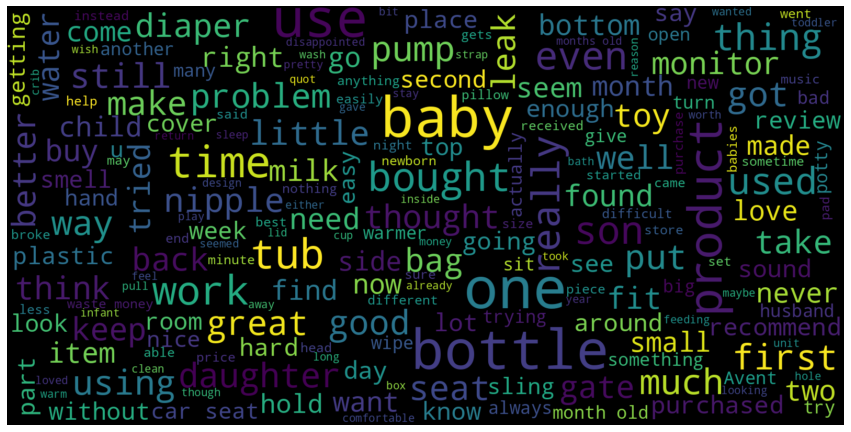

In [ ]:
from wordcloud import WordCloud, STOPWORDS
consolidated=' '.join(word for word in data['review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

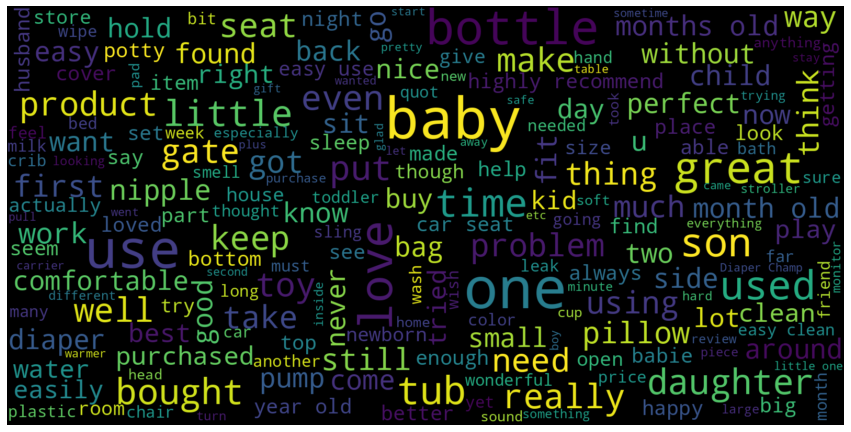

In [ ]:
consolidated=' '.join(word for word in data['review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review'])

Y = data['Sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2,random_state=32)

**Exercise 2**: **Implementation using K-Nearest Neighbor (KNN) Classifier**:  (1 point)


[Refer to the Logistic Regression Example in the above cells]

- Define the KNN classifier with Number of neighbours=5 using sklearn's **KNeighborsClassifier** function
- Train the KNN classifier
- Predict the test set
- Calculate accuracy on the KNN classifier
- Compute the F1 score

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)
# predicting the test data
y_pred1 = knn.predict(X_test)
print(y_pred1)


[0 1 1 ... 1 1 1]


In [ ]:
metrics.accuracy_score(y_test,y_pred1)

0.7680360721442886

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
metrics.f1_score(y_test, y_pred1,average='binary')

0.855897914721444

**Exercise 3**: **Implementation using Support Vector Machines (SVM) Classifier**:  (3 points)
  - First Reduce the features using PCA
  - use Hard-Margin Classifier
  - use Soft-Margin Classifier
  - use Kernel SVM Classifier



Background:
The next classifier we look into are support vector machines. 

![wget](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)

While the other classifiers such as the perceptron and the logistic regression uses a similar concept of finding a boundary between two classes using a straight line, SVMs aim to maximize this boundary. Therefore, not only the SVM tries to find a boundary, it tries to find the best boundary that separates the two classes. Again, with very simple tricks the two class classification can be easily extended to a multiclass classification. The formal formulation of a SVM is,

$g(x) = w^Tx + b$, is the equation of the line we want to find with weights $w$ and a bias $b$.

Now as seen from the figure, $g(x) = k$ and $g(x) = -k$ will give two worst lines for classification as they are right at the boundary of one of the classes. We need to maximize the distance of the line from both of the classes.

Therefore,

Maximize $k$ such that :

$-w^Tx + b \geq k \: for \: d_i == 1$

$-w^Tx + b \leq k \: for \: d_i == -1$

We keep $g(x) \geq 1$ and minimize $||w||$.

We finally write the final minimization function (uses Lagrangians to come to this solution).

Minimize: $J(w, b, \alpha) = \frac{1}{2}w^Tw - \Sigma_{i=1}^{N}(\alpha_id_i(w^Tx_i + b)) + \Sigma_{i=1}^{N}(\alpha_i)$

There are multiple types of SVM. We first use the standard linear SVM and check the performance of the model. However, SVM cannot be directly used on this dataset.   

The data is too large and the normal SVM function from `sklearn` will take a lot of time to run. Therefore, we first apply a PCA based dimensionality reduction technique on the input data. This will be followed by different types of SVM techniques and the performance can be compared. Since, dimensionality reduction is applied, a slight drop in performance is expected. However, with the improvement in the time taken for training a SVM in mind, it is important we first apply PCA based dimensionality reduction.

In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.


**Hints**
- Define the PCA model using sklearn's **TruncatedSVD**
- Fit the training data using **model.fit**
- Reduce the dimensions of the training data using **model.transform**
- Reduce the dimensions of the testing data using **model.transform**


- Use sklearn's **svm.SVC**. Appropriately choose the arguments - *kernel*, *gamma*, and *C* for hard-margin, soft-margin and kernel SVM classifiers.



In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model.fit(X_train,y_train)

# Predict the model 
predict = model.predict(X_test)

print(predict)

# Calculate the accuracy


cm = confusion_matrix(y_test, predict)
print(cm)
accuracy_score(y_test, predict)

print(classification_report(y_test, predict))


[0 1 0 ... 1 1 1]
[[ 338  196]
 [ 101 1361]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       534
           1       0.87      0.93      0.90      1462

    accuracy                           0.85      1996
   macro avg       0.82      0.78      0.80      1996
weighted avg       0.85      0.85      0.85      1996



   **Exercise 4**: **Implementation using Decision Trees**:  (1 point)

Decision Trees are supervised Machine Learning algorithms that can perform both classification and regression tasks and even multioutput tasks. They can handle complex datasets. As the name shows, it uses a tree-like model to make decisions in order to classify or predict according to the problem. It is an ML algorithm that progressively divides datasets into smaller data groups based on a descriptive feature until it reaches sets that are small enough to be described by some label.

The most important part of a decision tree is its explainability!

The importance of decision tree algorithm is that it has many applications in the real world. For example:

1. In the Healthcare sector: To develop Clinical Decision Analysis tools which allow decision-makers to apply for evidence-based medicine and make objective clinical decisions when faced with complex situations.
2. Virtual Assistants (Chatbots): To develop chatbots that provide information and assistance to customers in any required domain.
3. Retail and Marketing: Sentiment analysis detects the pulse of customer feedback and emotions and allows organizations to learn about customer choices and drives decisions.

**Hint**
Use sklearn's **DecisionTreeClassifier** function

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

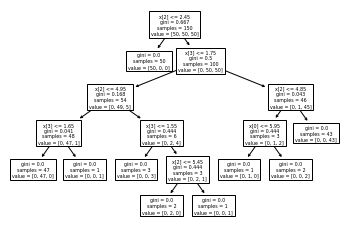

**Exercise 5**: **Implementation using Ensemble Classifier**:  (1 point) 
- use LogisticRegression, KNN, SVM, Naive Bayes and VotingClassifier as the weak classifiers

In [ ]:
# YOUR CODE(s) HERE

**Exercise 6**: **Implementation using Random Forest Classifier**:  (1 point)

A random forest is a collection of decision trees whose results are aggregated into one final result. Random Forest  is a supervised classification algorithm. There is a direct relationship between the number of trees in the forest and the results it can get: the larger the number of trees, the more accurate the result. But here creating the forest is not the same as constructing the decision tree with the information gain or gain index approach.
Steps:
1. Randomly select “k” features from total “m” features where k << m as shown in the figure below
2. Among the “k” features, calculate the node “d” using the best split point
3. Split the node into leaf nodes using the best split
4. Repeat the 1 to 3 steps until “l” number of nodes has been reached.
5. Build forest by repeating steps 1 to 4 for “n” number times to create “n” number of trees.
6. Take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome (target)
7. Calculate the votes for each predicted target
8. Consider the high voted predicted target as the final prediction from the random forest algorithm

**Hint**:
- Use sklearn's **RandomForestClassifier**
- Experiment with n_estimators, max_depth, max_leaf_nodes

In [ ]:
# YOUR CODE(s) HERE

**Exercise 7**: **Implementation using Clustering**: (1 point)
- k Means Clustering, with and without PCA=2
- Gaussian Mixture Models

**Hints**:
- Use sklearn's **MiniBatchKMeans**
- Use sklearn's **GaussianMixture**

In [ ]:
# A helper function to help labelling the test predictions
def label(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

# Use the above custom function
# YOUR CODE(s) HERE

**Exercise 8**: **Test your own sentence**: (1 point)
- Input your sentences ( One for positive and negative each)
- Print the output sentiment.**Exercise**

In [ ]:
# YOUR CODE(s) HERE